In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Create the DataFrame for train the model:

1. create random data using arrays for age, then classinfing it to child (0) or teenage (1).

In [26]:

#random ages
child = np.random.randint(1,11, 25)
tens = np.random.randint(13, 16, 25)

ages = np.concatenate((child, tens))

labels = []
#create labels for ages classification
for age in ages:
    if(age > 0 and age < 11):
        labels.append(0)
    elif(age > 12 and age < 16):
        labels.append(1)
    

#check from length:
print(f'Labels{len(labels)}, Ages{len(ages)}')


Labels50, Ages50


2. create the DataFrame that hold the arrays.

In [27]:
#create a DataFrame:
df = pd.DataFrame({'ages' : ages, 'labels' : labels})
df

,ages,labels
0,1,0
1,8,0
2,8,0
3,8,0
4,8,0
5,7,0
6,6,0
7,5,0
8,7,0
9,1,0


## Write the code for Logistic algorithm:

In [51]:

#values for training:
x = df['ages']
y = df['labels']

#values for the model:
epoch = 1500
learn_rate = 0.1
w = 0
b = 0
losses = []

#function to calculate the result:
def loss_fun(y_true, y_pred): 
    
    #to sure the range of output between [0,1]:
    eps = 1e-15 
    y_pred = np.clip(y_pred, eps, 1 - eps) #array, minimum value, maximum value

    #loss fun : (1/n) ( -y-true log(y_pred) - (1 - y_true) log(y_pred) )
    result = y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
    
    return (-np.mean(result))


#create the main model:
for i in range(epoch):
    z = x*w + b
    sigmuid = 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    error = sigmuid - y
    loss = loss_fun(y, sigmuid)
    losses.append(loss)

    #evaluate drivatives:
    dw = (1 / len(x)) * np.dot(x,error)
    db = (1 / len(x)) * np.sum(error)

    #update values:
    w -= learn_rate*dw
    b -= learn_rate*db

#final results:
z = w*x + b
r = 1. / (1. + np.exp(-np.clip(z, -250, 250)))
predicted = np.where(r >= 0.5, 1, 0)
    


# results:
z_final_result = w*x + b
print(f'Real values: ',y)
print(f'Predicted values:', predicted)
print(f'Loss: ', np.round(losses[-1], 2))
print(f'weight: ', np.round(w, 2))
print(f'intercept: ',np.round(b, 2))

Real values:  0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: labels, dtype: int64
Predicted values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Loss:  0.09
weight:  0.75
intercept:  -7.43


## Draw the chart for the loss of Logistic algorithm:

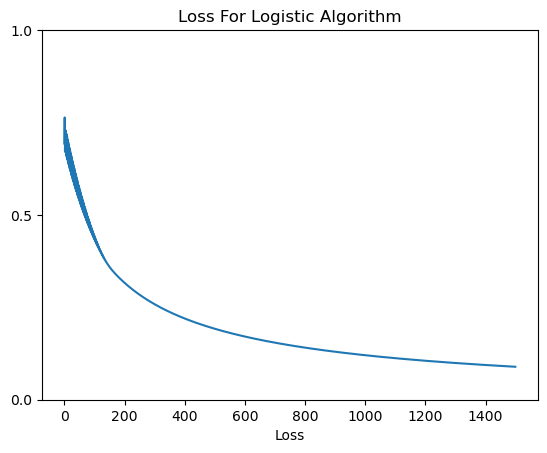

In [49]:
#draw a chart for loss:

plt.plot(np.arange(0, len(losses),1), np.array(losses))
plt.title('loss for logistic algorithm'.title())
plt.yticks([0, 0.5, 1])
plt.xlabel('Loss')
plt.show()